# Use CNN to detect if an image has a horse or a human

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import subprocess
import zipfile

## Load and explore data

In [13]:
## Create a folder to download our data
data_folder = 'data'
if not os.path.exists(data_folder):
    print("Creating data folder...")
    os.mkdir(data_folder)
    
## Download data
download_command = '''wget \
--no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O data/horse-or-human.zip'''

if not os.path.exists(data_folder + '/horse-or-human.zip'):
    print("Downloading data...")
    os.system(download_command)

In [12]:
## Unzip
zip_ref = zipfile.ZipFile(data_folder + '/horse-or-human.zip','r')
zip_ref.extractall('data/')
zip_ref.close()

Sub-folders labeled `humans` and `horses` have been created. This will be useful later on when using `ImageGenerator`

In [17]:
train_horse_dir = os.path.join(data_folder + '/horses')
train_human_dir = os.path.join(data_folder + '/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:3])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:3])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse42-5.png', 'horse42-1.png', 'horse47-2.png']
['human09-27.png', 'human02-30.png', 'human11-14.png']
total training horse images: 500
total training human images: 527


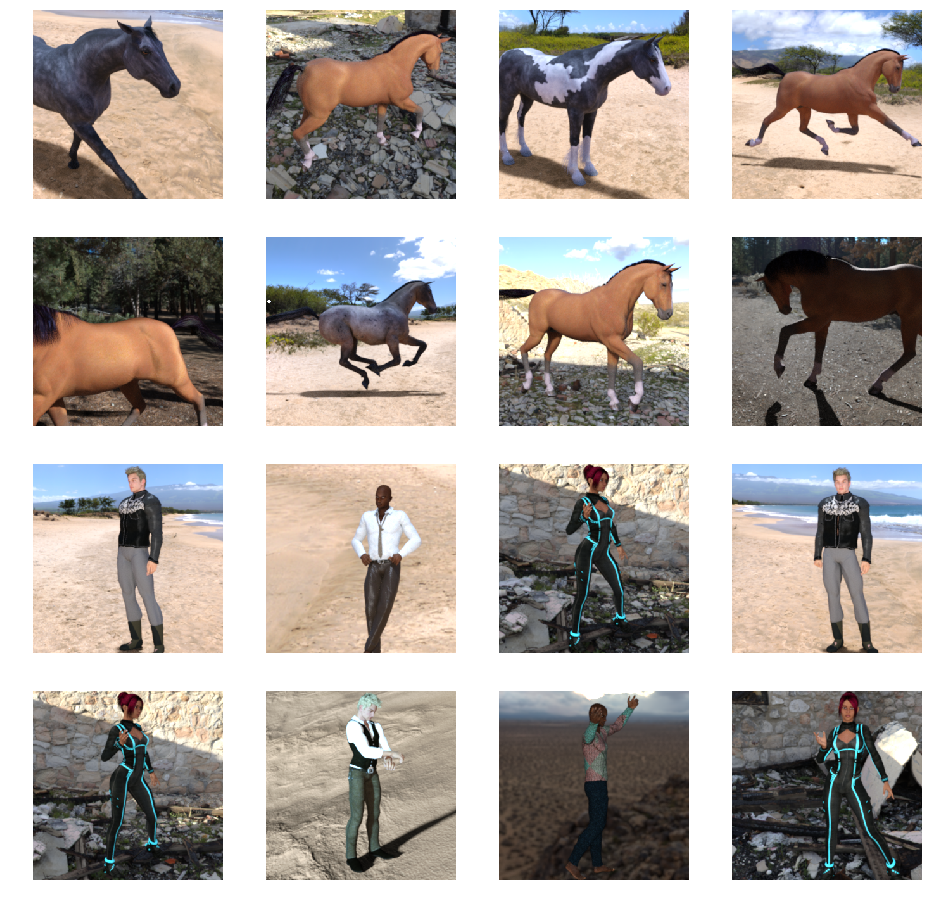

In [21]:
nrows = 4
ncols = 4
pic_index = 50

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows *4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

## Build the CNN
5 CNNs and a NN at the end

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    ## Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary()

W0623 19:32:37.369529 140632623085376 deprecation.py:506] From /home/elder/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [26]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

W0623 19:34:08.868762 140632623085376 deprecation.py:323] From /home/elder/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Preprocessing
The data generator will read pictures directly from the source folders, convert them to tensors, and feed them with labels to our NN.

In [30]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Pass training images in batches of 128
train_generator = train_datagen.flow_from_directory('data/',
                                                   target_size=(300,300),
                                                   batch_size=128,
                                                   class_mode='binary')

Found 1027 images belonging to 2 classes.


## Training

In [31]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=15,
                              verbose=1)

Epoch 1/15
8/8 [==============================] - 6s 711ms/step - loss: 0.9533 - acc: 0.5128
Epoch 2/15
8/8 [==============================] - 5s 676ms/step - loss: 0.7035 - acc: 0.5250
Epoch 3/15
8/8 [==============================] - 5s 624ms/step - loss: 0.6487 - acc: 0.5884
Epoch 4/15
8/8 [==============================] - 6s 731ms/step - loss: 0.6748 - acc: 0.7393
Epoch 5/15
8/8 [==============================] - 4s 547ms/step - loss: 0.6526 - acc: 0.7545
Epoch 6/15
8/8 [==============================] - 6s 789ms/step - loss: 0.3086 - acc: 0.9102
Epoch 7/15
8/8 [==============================] - 6s 699ms/step - loss: 0.1564 - acc: 0.9499
Epoch 8/15
8/8 [==============================] - 6s 756ms/step - loss: 0.3006 - acc: 0.8632
Epoch 9/15
8/8 [==============================] - 5s 675ms/step - loss: 0.1260 - acc: 0.9511
Epoch 10/15
8/8 [==============================] - 6s 742ms/step - loss: 0.0490 - acc: 0.9800
Epoch 11/15
8/8 [==============================] - 6s 727ms/step - lo

## Test the model

In [60]:
img_horse = tf.keras.preprocessing.image.load_img('data/horse.jpg', target_size=(300,300)
x = tf.keras.preprocessing.image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images,batch_size=10)
print(classes)

SyntaxError: invalid syntax (<ipython-input-60-8e210ab2a278>, line 2)

In [61]:
x.shape

(375, 507, 3)

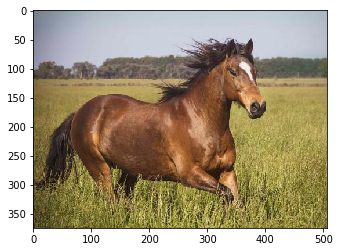

In [62]:
img = mpimg.imread('data/horse.jpg')
plt.imshow(img)
plt.show()

In [63]:
img.shape

(375, 507, 3)